### Kiến trúc của mô hình InceptionV3

Mô hình InceptionV3 là một trong những phiên bản cải tiến của mạng Inception, được phát triển bởi nhóm nghiên cứu của Google. Dưới đây là một số điểm chính về kiến trúc và cách hoạt động của các lớp convolution trong mô hình này:

#### 1. **Inception Modules**
InceptionV3 sử dụng các **Inception modules** để trích xuất đặc trưng từ hình ảnh. Mỗi module bao gồm nhiều lớp convolution với các kích thước kernel khác nhau (1x1, 3x3, 5x5) và một lớp max pooling. Kết quả từ các lớp này được kết hợp lại để tạo ra một feature map phong phú và đa dạng [1](https://sites.google.com/view/tienthm/inceptionv3).

#### 2. **Convolutional Layers**
Các lớp convolution (tích chập) là lớp đầu tiên trích xuất các đặc trưng từ hình ảnh. Mỗi lớp sử dụng một tập hợp các bộ lọc (filters) để phát hiện các đặc trưng như cạnh, góc, và các mẫu phức tạp hơn. Kích thước của các bộ lọc thường là 3x3 hoặc 5x5 [2](https://viblo.asia/p/tim-hieu-ve-convolutional-neural-network-va-lam-mot-vi-du-nho-ve-phan-loai-anh-aWj53WXo56m).

#### 3. **Pooling Layers**
Mô hình sử dụng cả max pooling và average pooling để giảm kích thước của feature map, giúp giảm số lượng tham số và tính toán cần thiết. Max pooling lấy giá trị lớn nhất trong một vùng, trong khi average pooling lấy giá trị trung bình [1](https://sites.google.com/view/tienthm/inceptionv3).

#### 4. **Auxiliary Classifiers**
InceptionV3 cũng sử dụng các bộ phân loại phụ (auxiliary classifiers) để giúp huấn luyện mạng hiệu quả hơn. Các bộ phân loại này giúp giảm thiểu vấn đề gradient vanishing bằng cách thêm các tín hiệu huấn luyện vào các lớp giữa của mạng [3](https://miai.vn/2020/11/17/tim-hieu-va-thu-transfer-learning-google-inception-net-voi-bai-toan-phan-loai-anh-oto/).

#### 5. **Batch Normalization**
Batch normalization được sử dụng để chuẩn hóa các đầu ra của mỗi lớp, giúp tăng tốc độ huấn luyện và ổn định quá trình học [1](https://sites.google.com/view/tienthm/inceptionv3).

### Cách hoạt động của các lớp Convolution

Các lớp convolution hoạt động bằng cách áp dụng các bộ lọc (filters) lên hình ảnh đầu vào để tạo ra các feature map. Mỗi bộ lọc trượt qua hình ảnh và thực hiện phép nhân điểm (dot product) giữa các giá trị của bộ lọc và các giá trị của hình ảnh. Kết quả là một feature map mới, trong đó mỗi điểm đại diện cho một đặc trưng cụ thể của hình ảnh [2](https://viblo.asia/p/tim-hieu-ve-convolutional-neural-network-va-lam-mot-vi-du-nho-ve-phan-loai-anh-aWj53WXo56m).

Ví dụ, một bộ lọc 3x3 có thể phát hiện các cạnh ngang trong hình ảnh, trong khi một bộ lọc 5x5 có thể phát hiện các mẫu phức tạp hơn. Các lớp convolution sâu hơn trong mạng sẽ trích xuất các đặc trưng ngày càng trừu tượng và phức tạp hơn [2](https://viblo.asia/p/tim-hieu-ve-convolutional-neural-network-va-lam-mot-vi-du-nho-ve-phan-loai-anh-aWj53WXo56m).


# Load model and get feature vecture


---



To generate the feature vector of any image, we will first use `tf.keras.applications.InceptionV3` to instantiate the model.

`weights = 'imagenet'` will load the imagenet weights into the Inception, and because we are not doing image classification here, we must remove the inception's last fully connected layer by `include_top = False`.

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

inception_v3 = tf.keras.applications.InceptionV3(
    weights='imagenet', #load the imagenet weights into the Inception
    include_top = False
    )

In [ ]:
def load_img(img_path):
  img = tf.io.read_file(img_path) #read file from disk
  img = tf.image.decode_jpeg(img, channels=3) #load as tensor
  img = tf.keras.layers.Resizing(224, 224)(img)
  img = img / 255
  return img

However, in order to get the feature vector, we must pass this loaded image to Inception v3.

To make this simple, we will write a `get_feature_vector` function that can take the path of any image, load it with the `load_img` function, pass the loaded image to the Inception v3 model, and then return the image and feature vectors back.

Adding the batch dimension even if there is only one image is to ensure that the input data is in the right format for deep learning models, as these models often require input data in the form of batches, even if the batch contains only one image.

In [ ]:
def get_feature_vector(img_path):
  img = load_img(img_path)
  img_tensor = tf.expand_dims(img, axis=0) # thêm một chiều mới vào tensor img tại axis=0 (đầu tensor), indicating that the batch contains only one image.
  feature_vector = inception_v3(img_tensor) # Using InceptionV3 model to extract feature vectors from images
  return img, feature_vector


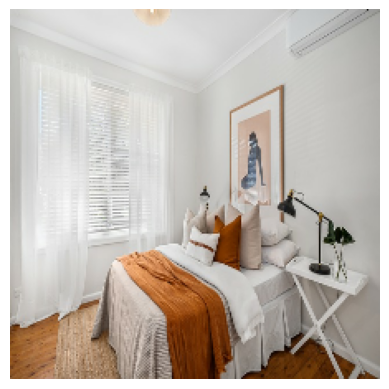


Image input size      :  (224, 224, 3)
Feature vector's shape:  (1, 5, 5, 2048)


In [ ]:
  img, feature_vector = get_feature_vector('/bedroom_hrnet_tutorial.jpg')

  plt.imshow(np.squeeze(img))
  plt.axis('off')
  plt.show()

  print()
  print('Image input size      : ', img.shape)
  print("Feature vector's shape: ", feature_vector.shape)



```
# The size of the feature vector (1, 5, 5, 2048) can be explained as follows:

* 1: This is the batch dimension, indicating that the batch contains only one image.
* 5: This is the height of the feature map after the image has been processed by the InceptionV3 model.
* 5: This is the width of the feature map after the image has been processed by the InceptionV3 model.
* 2048: This is the number of channels of the feature map, representing the features extracted from the image. In the InceptionV3 model, the final convolution layers often have a large number of channels (like 2048)
```



These feature vectors cannot be displayed because they are completely abstract, but if you look at the embedding space of feature vectors, they tend to group similar images together.

> Embedding space is a multidimensional space in which feature vectors are represented. Each point in this space represents a feature vector, and points close to each other in this space often represent objects with similar features.

This is why some people refer to feature vectors as image embeddings.

# Generate caption with RNN

---



The next step is to pass these feature vectors
via a fully connected layer.

But why is that?

Because the feature vector has 2048 dimensions,
we must downsample it to a lower dimension, such as 256 or 512, using a fully connected layer.

This will considerably boost the training speed and save you from that frustrating memory-exhausted error.

Now, our neural network has an active understanding of images, so we must train it to understand the text as well in order to generate captions.
We will use RNN to generate the caption **word-by-word**.

During training, we have the corresponding captions for every image.
That's why our training objective is to give the first word from the caption and the feature vector to the attention mechanism, and the
output of the attention will directly go to the RNN, and the task of the RNN is to predict the next word in the caption.

If the predicted next word is correct, the loss is minimal; if it is wrong, the loss is maximum, and this process of generating the next word will repeat until the end of the sentence is reached.

### **What can attention mechanism do?**

  Attention, as the name suggests, automatically
  learns to focus on various regions in the image.

  If the next word to be predicted is "dog," it will only pick the feature vector that corresponds to "dog" and ignore the rest of all the unnecessary features.

  Then these modified feature vectors will go
  to the RNN, which will predict the next word.

